# <font color='green'>Predicting Stocks (Goes up or down) using News Headlines</font>

In [1]:
import pandas as pd
import numpy as np 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go
import plotly.express as px


warnings.filterwarnings('ignore')

# imported the file which contains top 25 headlines, stock went up or down(label) and date
data1 = pd.read_csv('Combined_News_DJIA.csv')
data1.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [2]:
data1.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

## <font color='darkred'>Data Cleaning</font>

In [3]:
# filling the null values with median 

data1['Top23'].fillna(data1['Top23'].median,inplace=True)
data1['Top24'].fillna(data1['Top24'].median,inplace=True)
data1['Top25'].fillna(data1['Top25'].median,inplace=True)

In [4]:
# seperating the data into train and test

train = data1[data1['Date'] < '20150101']
test = data1[data1['Date'] > '20141231']

In [5]:
# removing punctuations and changing all the letters to lowercase for both train and test

all_data = [train,test]

for df in all_data:
    df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
    for i in df.columns:
        if i=='Date':
            continue
        if i=='Label':
            continue
        df[i] = df[i].str.lower()

train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,,0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,,1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...
2,,0,b remember that adorable year old who sang a...,b russia ends georgia operation,b if we had no sexual harassment we would hav...,b al qa eda is losing support in iraq because ...,b ceasefire in georgia putin outmaneuvers the...,b why microsoft and intel tried to kill the xo...,b stratfor the russo georgian war and the bal...,b i m trying to get a sense of this whole geor...,...,b u s troops still in georgia did you know t...,b why russias response to georgia was right,b gorbachev accuses u s of making a serious ...,b russia georgia and nato cold war two,b remember that adorable year old who led y...,b war in georgia the israeli connection,b all signs point to the us encouraging georgi...,b christopher king argues that the us and nato...,b america the new mexico,b bbc news asia pacific extinction by man...
3,,0,b u s refuses israel weapons to attack iran ...,b when the president ordered to attack tskhinv...,b israel clears troops who killed reuters cam...,b britain s policy of being tough on drugs is...,b body of year old found in trunk latest ...,b china has moved million quake survivors...,b bush announces operation get all up in russi...,b russian forces sink georgian ships,...,b elephants extinct by,b us humanitarian missions soon in georgia i...,b georgia s ddos came from us sources,b russian convoy heads into georgia violating...,b israeli defence minister us against strike ...,b gorbachev we had no choice,b witness russian forces head towards tbilisi...,b quarter of russians blame u s for conflict...,b georgian president says us military will ta...,b nobel laureate aleksander solzhenitsyn...
4,,1,b all the experts admit that we should legalis...,b war in south osetia pictures made by a ...,b swedish wrestler ara abrahamian throws away ...,b russia exaggerated the death toll in south o...,b missile that killed inside pakistan may ha...,b rushdie condemns random house s refusal to p...,b poland and us agree to missle defense deal ...,b will the russians conquer tblisi bet on it ...,...,b bank analyst forecast georgian crisis days...,b georgia confict could set back russia s us r...,b war in the caucasus is as much the product o...,b non media photos of s

In [6]:
# combining all the headlines in train data into one and appending them into a list 

headlines = []
for row in range(0,len(train.index)):
    headlines.append(' '.join(str(x) for x in train.iloc[row,2:]))
headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [7]:
# combining all the headlines in test data into one and appending them into a list 

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [8]:
test_transform[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

## <font color='darkred'>Applying Machine Learning Algorithms (Random forest , XGBOOST and CATBoost)</font>

In [9]:
# Applying countvectorizer on headlines list that we created before and max features is set to 100009

countvector=CountVectorizer(ngram_range=(2,2),max_features=100009)
traindataset=countvector.fit_transform(headlines)

randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [18]:
traindataset_df = pd.DataFrame(traindataset.toarray(),columns=countvector.get_feature_names())
traindataset_df

,aaa credit,aaa rating,aadmi party,aam aadmi,aamer the,aap party,abandon iran,abandon its,abandon military,abandon net,...,zone the,zone to,zone will,zone with,zones and,zoo in,zoologists hunting,zoos into,zoos npr,zu guttenberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
traindataset_df.sum(axis=0).sort_values(ascending=False).index

Index(['of the', 'in the', 'to the', 'to be', 'on the', 'the world', 'for the',
       'has been', 'north korea', 'by the',
       ...
       'meth produced', 'being developed', 'meth use', 'meth was',
       'methane alarm', 'computers detaining', 'methane catastrophe',
       'housemaid accused', 'households into', 'microwaves police'],
      dtype='object', length=100009)

Text(0.5, 1.0, 'Most repeated words in the headlines(training set)')

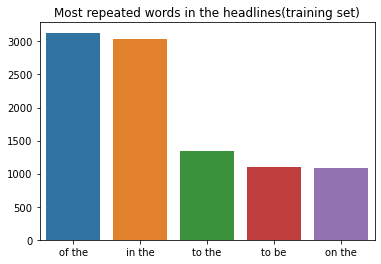

In [35]:
import seaborn as sns
sns.barplot(traindataset_df.sum(axis=0).sort_values(ascending=False).index[:5],traindataset_df.sum(axis=0).sort_values(ascending=False)[:5]).set_title('Most repeated words in the headlines(training set)')



<font color='darkblue'>The maximum features for countvectorizer is set to 100009 because, i tried many other numbers for maximum features and for 100009 i got the best accuracy, with lowest False positive values ( you can see below in the confusion matrix you can try other values and check it yourself, if you find the best accuracy with other maximum features then comment below</font>

### <font color='darkred'>Random forest without hyperparameter tuning</font>

In [37]:
# Applying countvectorizer on test_transform list that we created before 

test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [38]:
testdataset_df = pd.DataFrame(test_dataset.toarray(),columns=countvector.get_feature_names())
testdataset_df

,aaa credit,aaa rating,aadmi party,aam aadmi,aamer the,aap party,abandon iran,abandon its,abandon military,abandon net,...,zone the,zone to,zone will,zone with,zones and,zoo in,zoologists hunting,zoos into,zoos npr,zu guttenberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most repeated words in the headlines(test set)')

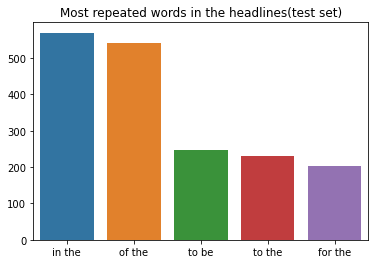

In [39]:
sns.barplot(testdataset_df.sum(axis=0).sort_values(ascending=False).index[:5],testdataset_df.sum(axis=0).sort_values(ascending=False)[:5]).set_title('Most repeated words in the headlines(test set)')

In [10]:
# confusion matrix  

matrix=confusion_matrix(test['Label'],predictions)
print(matrix)

[[132  54]
 [  6 186]]


In [11]:
# accuracy score (compared test daset original output values with predictions)

score=accuracy_score(test['Label'],predictions)
print(score)

0.8412698412698413


<font color='darkblue'>Lets apply XGBoost , and will also try different numbers of max features for countvectorizer and see which number gives us the maximum accuracy</font>




### <font color='darkred'>XGBoost without hyperparameter tuning</font>

In [12]:
max_features_num = [500,600,700,800,900,1000]
ngram = [1,2,3,4,5]
for i in max_features_num:
    for j in ngram:
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        xgb = XGBClassifier(random_state =1)
        xgb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
        predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
        score=accuracy_score(test['Label'],predictions)
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print(score)
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        print('===============================')

max number of features used : 500
ngram_range (1,1)
0.843915343915344
confusion matrix : [[156  30]
 [ 29 163]]
max number of features used : 500
ngram_range (2,2)
0.843915343915344
confusion matrix : [[149  37]
 [ 22 170]]
max number of features used : 500
ngram_range (3,3)
0.753968253968254
confusion matrix : [[130  56]
 [ 37 155]]
max number of features used : 500
ngram_range (4,4)
0.6349206349206349
confusion matrix : [[ 82 104]
 [ 34 158]]
max number of features used : 500
ngram_range (5,5)
0.5502645502645502
confusion matrix : [[ 31 155]
 [ 15 177]]
max number of features used : 600
ngram_range (1,1)
0.843915343915344
confusion matrix : [[156  30]
 [ 29 163]]
max number of features used : 600
ngram_range (2,2)
0.8227513227513228
confusion matrix : [[153  33]
 [ 34 158]]
max number of features used : 600
ngram_range (3,3)
0.7380952380952381
confusion matrix : [[128  58]
 [ 41 151]]
max number of features used : 600
ngram_range (4,4)
0.6428571428571429
confusion matrix : [[ 76 110]

<font color='darkblue'>Maximum accuracy :</font>

max number of features used : 800

ngram_range (2,2)

0.8650793650793651

confusion matrix : [[161  25]
 [ 26 166]]

In [13]:
countvector=CountVectorizer(ngram_range=(1,1),max_features=800)
traindataset=countvector.fit_transform(headlines)
test_dataset = countvector.transform(test_transform)


xgb = XGBClassifier(random_state =1)
xgb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))

In [14]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,

### <font color='darkred'>CATBoost without hyperparameter tuning</font>

In [15]:
cb=CatBoostClassifier(random_state=1)
cb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
matrix=confusion_matrix(test['Label'],predictions)
score=accuracy_score(test['Label'],predictions)
print(score)
print('===============')
print(matrix)

Learning rate set to 0.013437
0:	learn: 0.6924865	total: 73.2ms	remaining: 1m 13s
1:	learn: 0.6919839	total: 89.2ms	remaining: 44.5s
2:	learn: 0.6916499	total: 112ms	remaining: 37.3s
3:	learn: 0.6910524	total: 133ms	remaining: 33.2s
4:	learn: 0.6907999	total: 151ms	remaining: 30s
5:	learn: 0.6905346	total: 173ms	remaining: 28.7s
6:	learn: 0.6899405	total: 195ms	remaining: 27.6s
7:	learn: 0.6895518	total: 214ms	remaining: 26.6s
8:	learn: 0.6889756	total: 238ms	remaining: 26.2s
9:	learn: 0.6886122	total: 257ms	remaining: 25.5s
10:	learn: 0.6880976	total: 282ms	remaining: 25.4s
11:	learn: 0.6876442	total: 301ms	remaining: 24.8s
12:	learn: 0.6874357	total: 315ms	remaining: 23.9s
13:	learn: 0.6870072	total: 331ms	remaining: 23.3s
14:	learn: 0.6866757	total: 345ms	remaining: 22.6s
15:	learn: 0.6861929	total: 360ms	remaining: 22.1s
16:	learn: 0.6859367	total: 375ms	remaining: 21.7s
17:	learn: 0.6855844	total: 390ms	remaining: 21.3s
18:	learn: 0.6851102	total: 408ms	remaining: 21.1s
19:	learn:

<font color='darkblue'>Catboost is giving the same results as xgboost

Now lets use hyperparameters and see whether the model is improving or not 
    
At first we will perform hyperparameter tuning for random forest</font>

###  <font color='darkred'>Random forest with hyperparameter tuning </font>

In [16]:
def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,300,400],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [None,15, 20],
                                  'max_features': ['auto', 10],
                                  'min_samples_leaf': [1,2,5],
                                  'min_samples_split': [2,3,5]}

clf_rf = GridSearchCV(rf,param_grid = param_grid, cv=5 , verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(traindataset,train['Label'])
performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 57.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 57.8min finished


Random Forest
Best Score: 0.5453544351235262
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
best_rf = best_clf_rf.best_estimator_

In [18]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)
test_dataset = countvector.transform(test_transform)

best_rf.fit(traindataset,train['Label'])
predictions = best_rf.predict(test_dataset)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
score=accuracy_score(test['Label'],predictions)
print(score)
print('========================')
print('confusion matrix :')
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)

0.8518518518518519
confusion matrix :
[[131  55]
 [  1 191]]


<font color='darkblue'>As you can see that performing hyperparameter tuning on randomforest made the model good predictions and also decreased the false negative value.
</font>


<font color='darkblue'>Lets use hyperparameter tuning for XGBOOST and see if the accuracy is improving or not</font>

 ###  <font color='darkred'>XGBoost with hyperparameter tuning </font>

In [20]:
countvector=CountVectorizer(ngram_range=(1,1),max_features=800)
traindataset=countvector.fit_transform(headlines)
test_dataset = countvector.transform(test_transform)

xgb = XGBClassifier(random_state =1)
param_grid = {
    'n_estimators': [500,550,600,650],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65,0.9],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.7min finished


XGB
Best Score: 0.5142422670010667
Best Parameters: {'subsample': 0.55, 'sampling_method': 'uniform', 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 550, 'min_child_weight': 0.01, 'max_depth': None, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.85}


In [21]:
best_clf_xgb = best_clf_xgb.best_estimator_

best_rf.fit(traindataset,train['Label'])
predictions = best_rf.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [22]:
score=accuracy_score(test['Label'],predictions)
print('score :')
print(score)
print('==================================')
print('confusion matrix :')
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)

score :
0.8068783068783069
confusion matrix :
[[139  47]
 [ 26 166]]


<font color='darkblue'>As you can see above , after using hyperparameters for XGBoost , the accuracy didn't improve </font>

## <font color='darkred'> Conclusion</font>



<font color='darkblue'>After all this analysis we can conclude that the best algorithm which gave good accuracy and less false negetive values is randomforest using hyperparameter tuning

If you care about more true positive values and less on false negetive values then the best algorithm for you is XGBOOST without hyperparameter tuning</font>

In [40]:
fin_score = {'randomforest (without hp)':0.859788 , 'randomforest (with hp)':0.851851,
             'XGBoost (without hp)':0.8650793,'XGBoost (with hp)':0.806878,'CATBoost(without hpt)':0.83597}
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [41]:
px.bar(x = list(fin_score.keys()),y = list(fin_score.values()),title='ACCURACY SCORE FOR RF AND XGB (WITH AND WITHOUR HYPERPARAMETERS)',labels={'x':'Algorithms','y':'Score'})

In [42]:
x1 = ['randomforest(without hpt)','randomforest(with hpt)','XGBoost(without hpt)','XGBoost(with hpt)','CATBoost(without hpt)']
x1_TP = [135,131,161,139,154]
X1_FN = [5,1,26,26,30]

In [43]:
fig = go.Figure(data=[
    go.Bar(name='TRUE POSITIVE', x=x1, y=x1_TP),
    go.Bar(name='FALSE NEGATIVE', x=x1, y=X1_FN)
])

fig.update_layout(barmode='group')
fig.show()

#### <font color='darkblue'>If you want to have a clear pictures of which model performed well and which model got more true positives and false negatives ,you can see the above visualizations and decide which model you need according to your requirements</font>

#### <font color='darkblue'>Thank you :)</font>